In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
data = pd.read_excel("C:/Users/brand/Desktop/DSTI/Python for ML/Project 3/sleep_study_2007_cleaned_v.01.xlsx")

In [31]:
# Display the first few rows of the dataset
print(data.head())

                  Common name       Genus species  Total sleep time, hr  \
0   Lesser short-tailed shrew     Cryptotis parva                   9.1   
1            Little brown bat    Myotis lucifugus                  19.9   
2  Greater short-tailed shrew  Blarina brevicauda                  14.9   
3               Big brown bat    Eptesicus fuscus                  19.7   
4                  Musk shrew      Suncus murinus                  12.8   

   REM sleep time, hr  sleep cycle time, min  Total awake time, hrs  \
0                 1.4                    9.0                   14.9   
1                 2.0                   12.0                    4.1   
2                 2.3                    8.0                    9.1   
3                 3.9                    7.0                    4.3   
4                 2.0                   11.0                   11.2   

   (Total sleep time)/(Total awake time)  \
0                               0.610738   
1                               4.

In [32]:
# Get a summary of the dataset
print(data.describe())

       Total sleep time, hr  REM sleep time, hr  sleep cycle time, min  \
count             56.000000           48.000000              30.000000   
mean              10.171429            1.916667              25.833333   
std                4.421794            1.184354              21.934201   
min                2.900000            0.400000               7.000000   
25%                7.575000            1.075000              11.000000   
50%                9.950000            1.800000              18.500000   
75%               12.575000            2.400000              32.250000   
max               19.900000            6.100000              90.000000   

       Total awake time, hrs  (Total sleep time)/(Total awake time)  \
count              56.000000                              56.000000   
mean               13.828571                               1.013257   
std                 4.421794                               0.998831   
min                 4.100000                     

In [33]:
# Check for missing values / candidates to remove
print(data.isnull().sum())

Common name                                0
Genus species                              0
Total sleep time, hr                       0
REM sleep time, hr                         8
sleep cycle time, min                     26
Total awake time, hrs                      0
(Total sleep time)/(Total awake time)      0
R, fraction of sleep time spent in REM     8
Brain mass, g                              0
Body mass, kg                              0
Body mass ref.                             0
dtype: int64


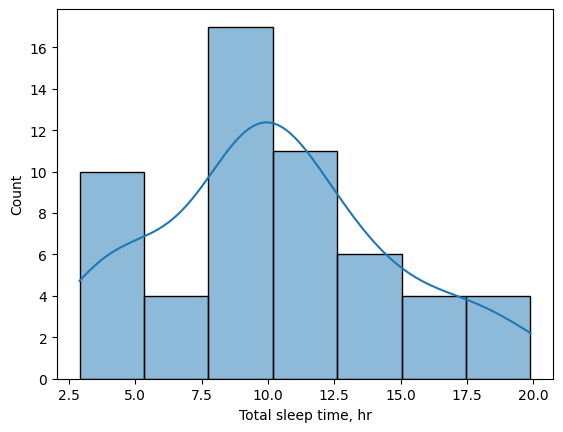

In [34]:
# Histograms for continuous variables
sns.histplot(data['Total sleep time, hr'], kde=True)
plt.show()

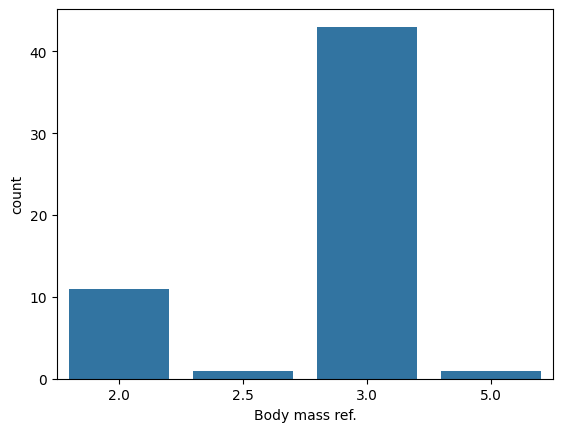

In [35]:
# Box plots / count plots for categorical variables
sns.countplot(x='Body mass ref.', data=data)
plt.show()

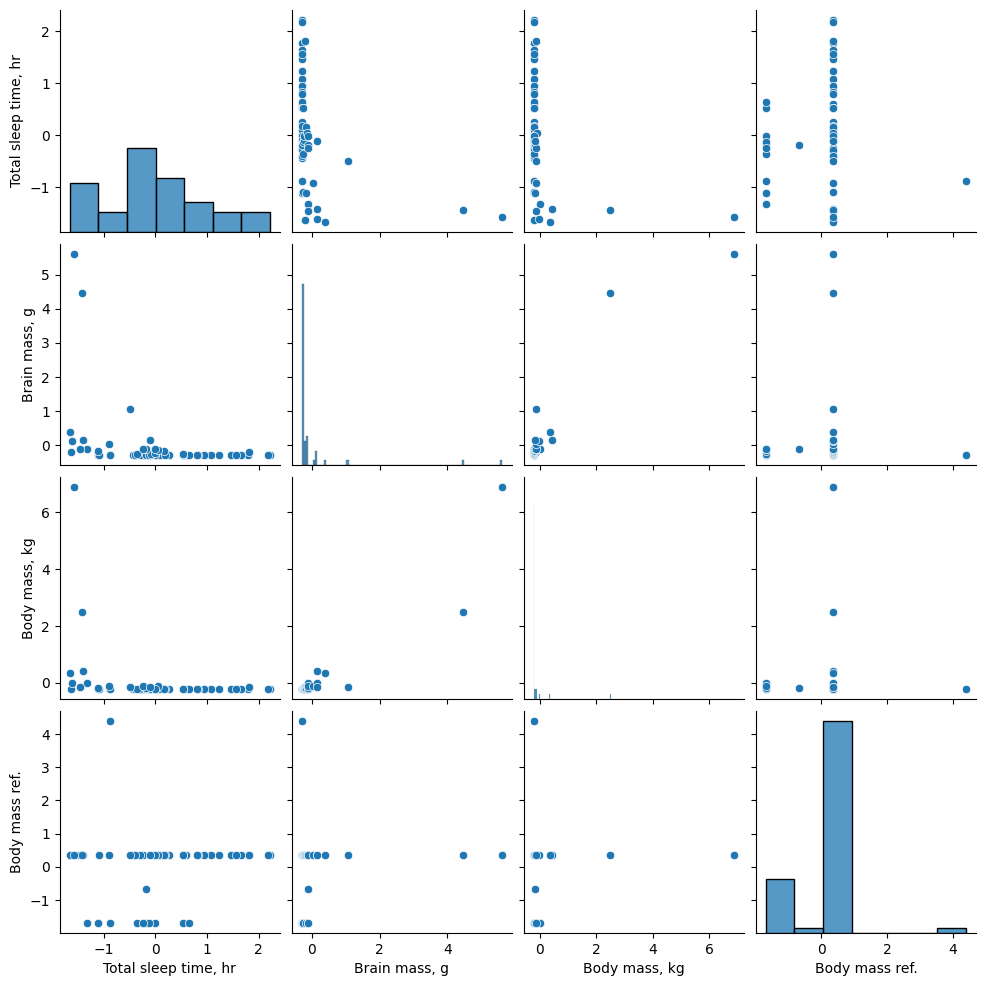

In [36]:
from sklearn.preprocessing import StandardScaler

# Selecting the relevant columns
columns_to_normalize = ['Total sleep time, hr', 'Brain mass, g', 'Body mass, kg', 'Body mass ref.']
data_to_normalize = data[columns_to_normalize]

# Normalizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_to_normalize)
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

# Using pairplot on the normalized data
sns.pairplot(normalized_df)
plt.show()

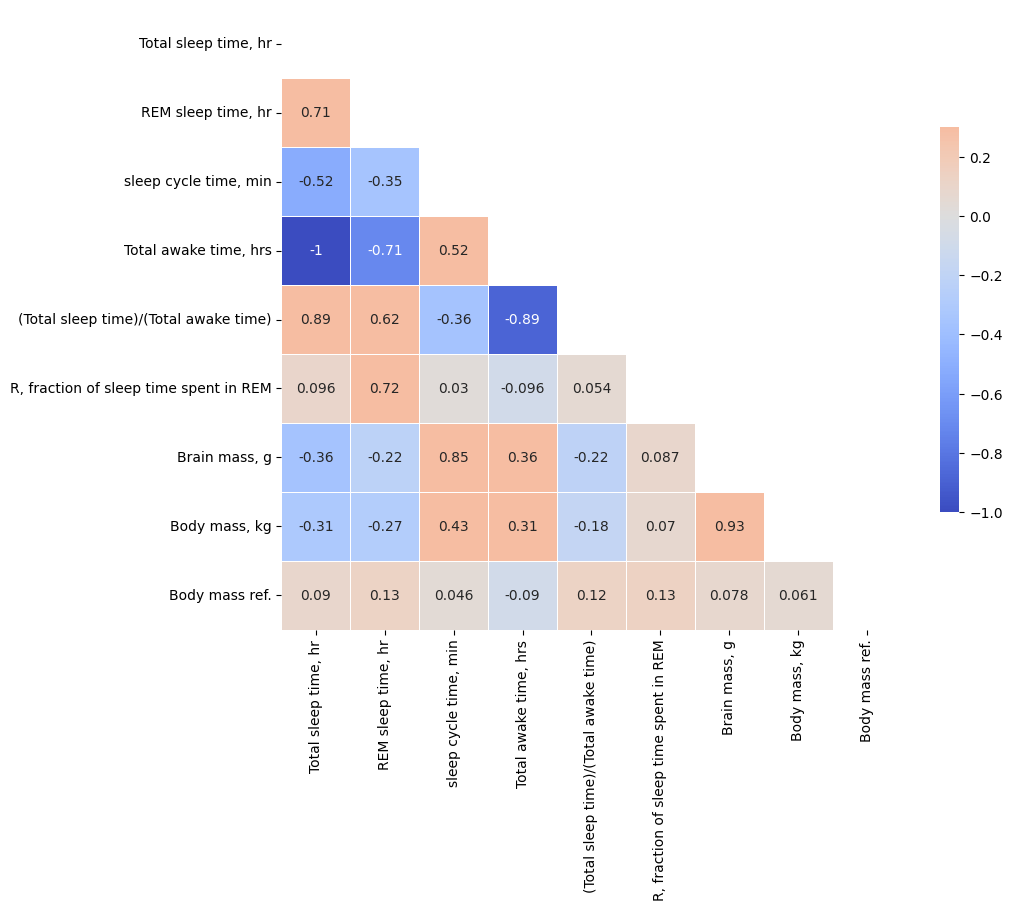

In [37]:
# Filtering only numerical columns for correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Setting up the matplotlib figure
plt.figure(figsize=(10, 10))

# Generating a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(numerical_data.corr(), dtype=bool))

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(numerical_data.corr(), annot=True, mask=mask, cmap='coolwarm', 
            vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Displaying the plot
plt.show()

In [38]:
# Log transform data
data['LogBodyWt'] = np.log(data['Body mass, kg'] + 1)
data['LogBrainWt'] = np.log(data['Brain mass, g'] + 1)

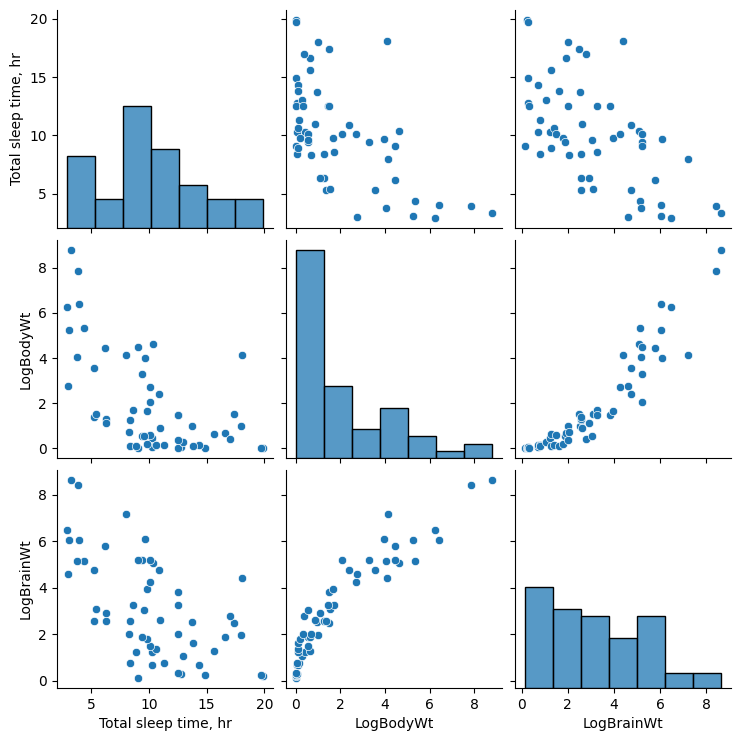

In [39]:
# Pairplot to visualise relationships after log transformation
sns.pairplot(data[['Total sleep time, hr', 'LogBodyWt', 'LogBrainWt']])
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# 'TotalSleep' as target and other columns are features
X = data[['LogBodyWt', 'LogBrainWt']]  # Include other relevant features
y = data['Total sleep time, hr']

In [89]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Initialize the model
model = LinearRegression()

In [91]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [92]:
# Predict on the test data
y_pred = model.predict(X_test)

In [93]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [94]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 12.901562388258455
R^2 Score: 0.49156404381247465


In [95]:
min_sleep = data['Total sleep time, hr'].min()
max_sleep = data['Total sleep time, hr'].max()

print(f"Minimum Total Sleep: {min_sleep} hours")
print(f"Maximum Total Sleep: {max_sleep} hours")

Minimum Total Sleep: 2.9 hours
Maximum Total Sleep: 19.9 hours


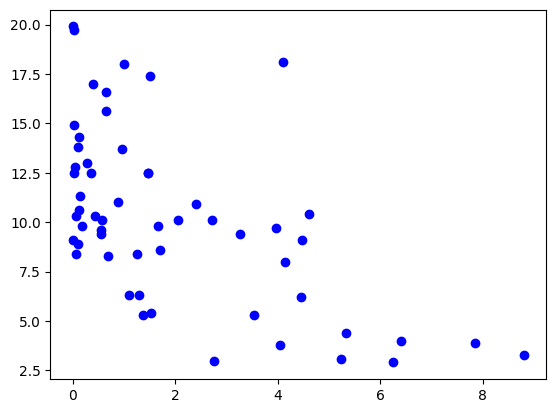

In [96]:
# 'data' is the DataFrame and 'model' is the trained LinearRegression model

# Scatter plot of the actual data
plt.scatter(data['LogBodyWt'], data['Total sleep time, hr'], color='blue', label='Actual Data')

In [97]:
# Calculate the mean values for the other features
mean_LogBodyWt = data['LogBodyWt'].mean()
mean_logbrainwt = data['LogBrainWt'].mean()

In [98]:
# Creating a DataFrame for predictions, ensuring the column order matches the training data
log_bodywt_range = np.linspace(data['LogBodyWt'].min(), data['LogBodyWt'].max(), 100)
prediction_df = pd.DataFrame({
    'LogBodyWt': log_bodywt_range,
    'LogBrainWt': [mean_logbrainwt] * len(log_bodywt_range)  # mean_logbrainwt defined earlier
})

In [99]:
# Predict 'TotalSleep' using the model for each value in the range
predicted_sleep = model.predict(prediction_df)

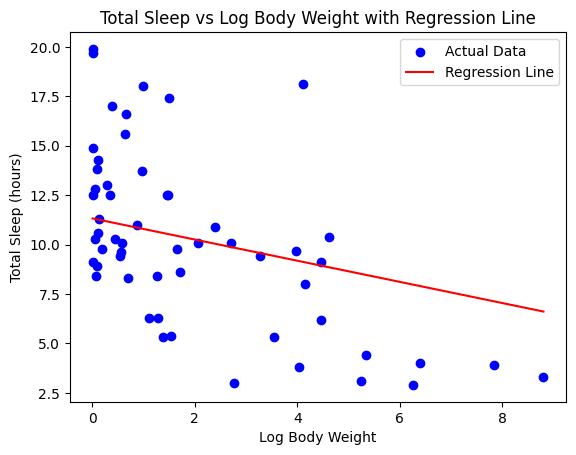

In [100]:
# Create the scatter plot
plt.scatter(data['LogBodyWt'], data['Total sleep time, hr'], color='blue', label='Actual Data')

# Create the regression line plot
plt.plot(log_bodywt_range, predicted_sleep, color='red', label='Regression Line')

# Adding labels, title, and legend
plt.xlabel('Log Body Weight')
plt.ylabel('Total Sleep (hours)')
plt.title('Total Sleep vs Log Body Weight with Regression Line')

# Display the legend
plt.legend()

# Show the plot
plt.show()